# Project 8: Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

## Data Import and first Inspection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
houses = pd.read_excel('housing.csv.xlsx' )

In [ ]:
houses.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df = houses.copy()

__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [ ]:
 houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Check for NULL values**

In [ ]:
houses.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**the number of null values is small so it will be removed**

In [ ]:
houses.dropna(inplace = True)

In [ ]:
houses.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


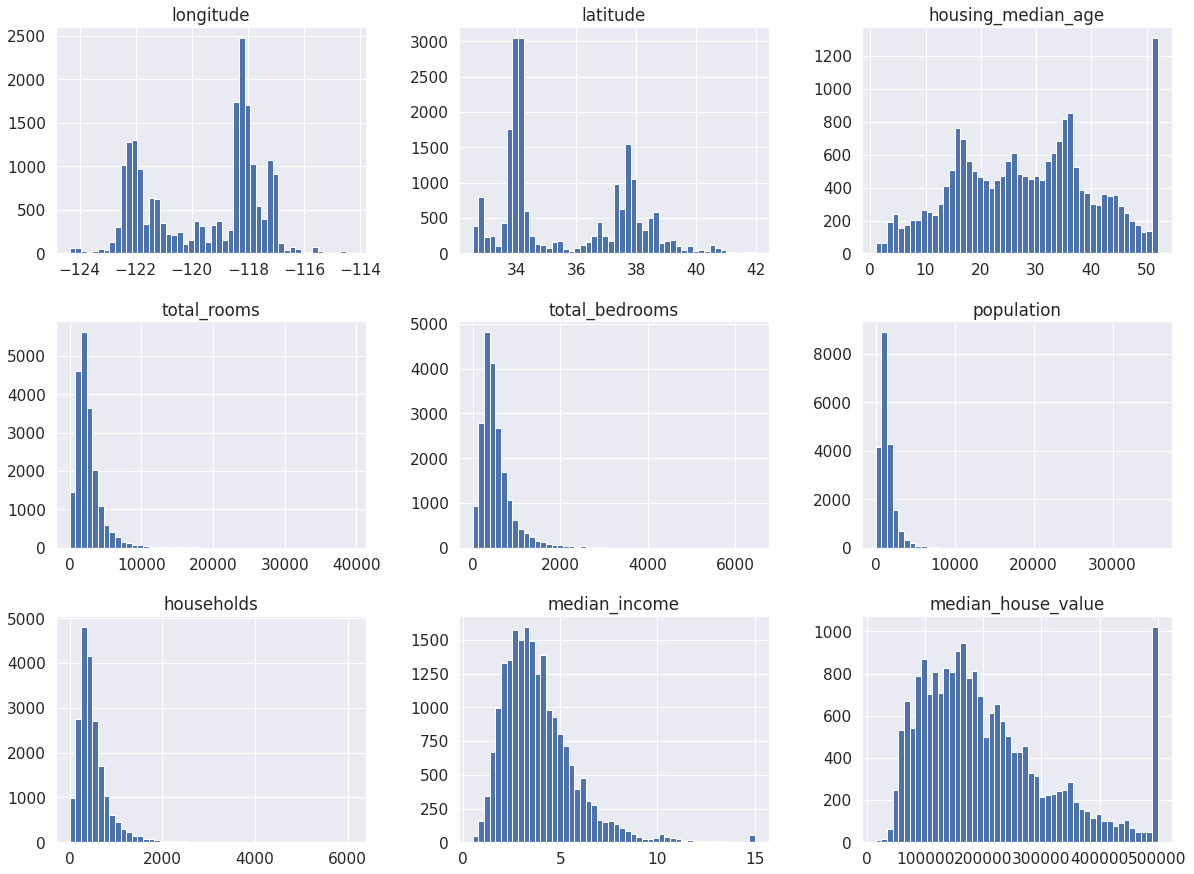

In [ ]:
houses.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
houses.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

**The near ocean houses and near bay is a small numbeer we can prove that by the median_house_value in the histogram we can see the tail in the histogram and that  is because the small number of the houses that near the ocean **
**.**

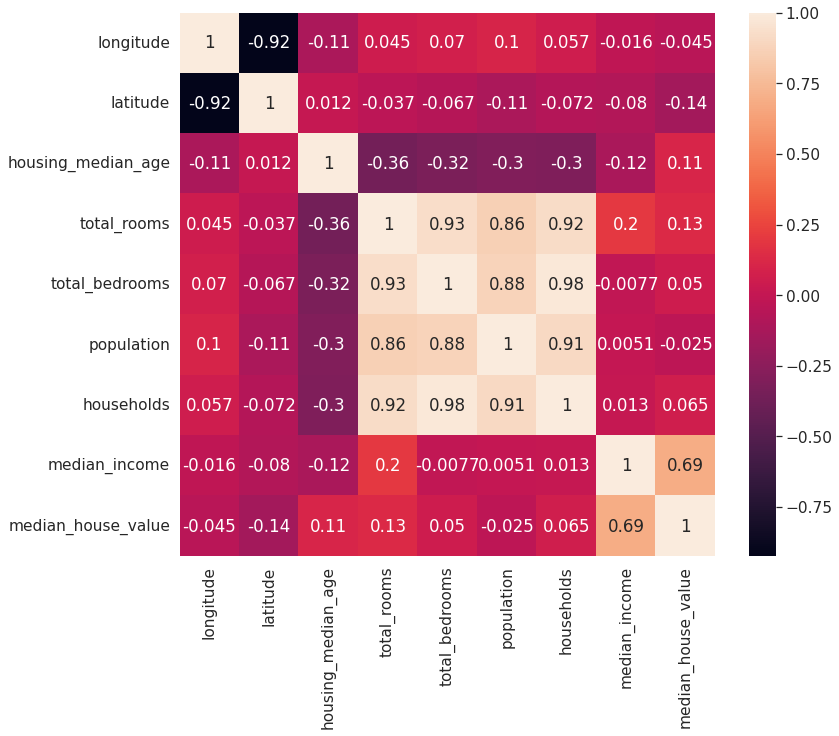

In [ ]:
fig, ax = plt.subplots(figsize=(12,10));
sb.heatmap(houses.corr(),annot=True,ax =ax );

**We are tryig to predict the median house value  and from the heatmap we don't have alot of features that have a positive or negative relationship with it so lets make some new features that may have a correlation with it**

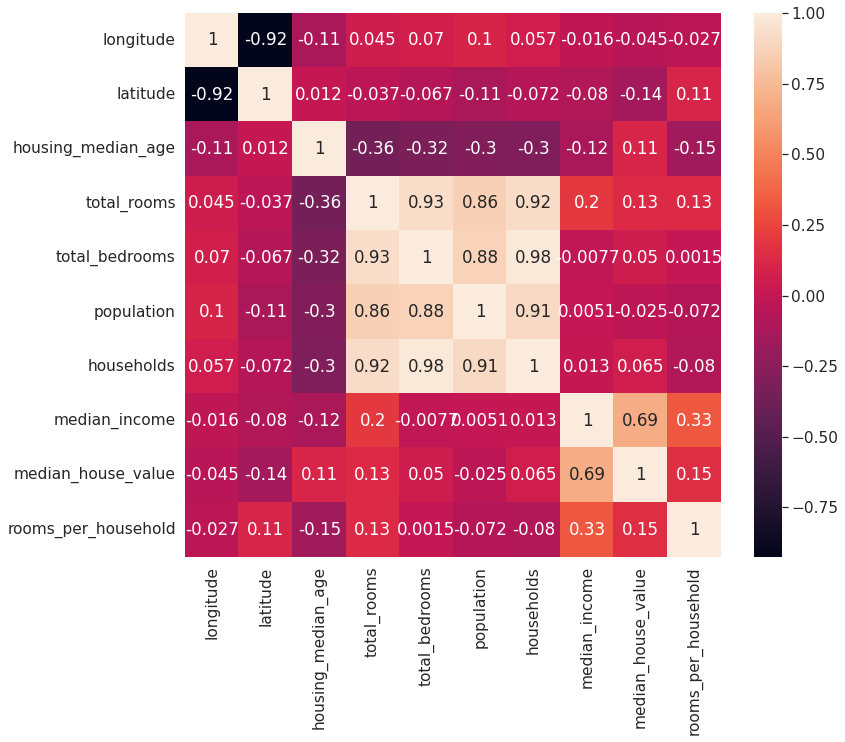

In [ ]:
houses['rooms_per_household'] = houses.total_rooms/houses.households
fig, ax = plt.subplots(figsize=(12,10));
sb.heatmap(houses.corr(),annot=True,ax =ax );

**the main features that inflounce the house_price is:**
<br>
**1- rooms_per_household positive corr by 0.15**
<br>

**2- median_income  positive corr by 0.69**
<br>

**3- total_rooms  positive corr by 0.13**
<br>

**4- median_age  positive corr by 0.11**
<br>

**5- latitude  negative corr by 0.14**

****>>>>>Preprocessing pipeline****

In [ ]:
cols = np.append(np.array(houses.columns),['1','2','3','4']) 
cat_col = ['ocean_proximity']
num_col = houses.select_dtypes(exclude='object').columns
Transformation_pipeline = ColumnTransformer([
    ('num',MinMaxScaler(),num_col),
    ('cat',OneHotEncoder(),cat_col)  
])
norm_houses = pd.DataFrame(Transformation_pipeline.fit_transform(houses),columns = cols)


In [ ]:
target = norm_houses.median_house_value
features = norm_houses.drop(columns = 'median_house_value')
xtrain,xtest,ytrain,ytest =train_test_split(features , target, test_size=0.20, random_state=42)

## EDA with Seaborn

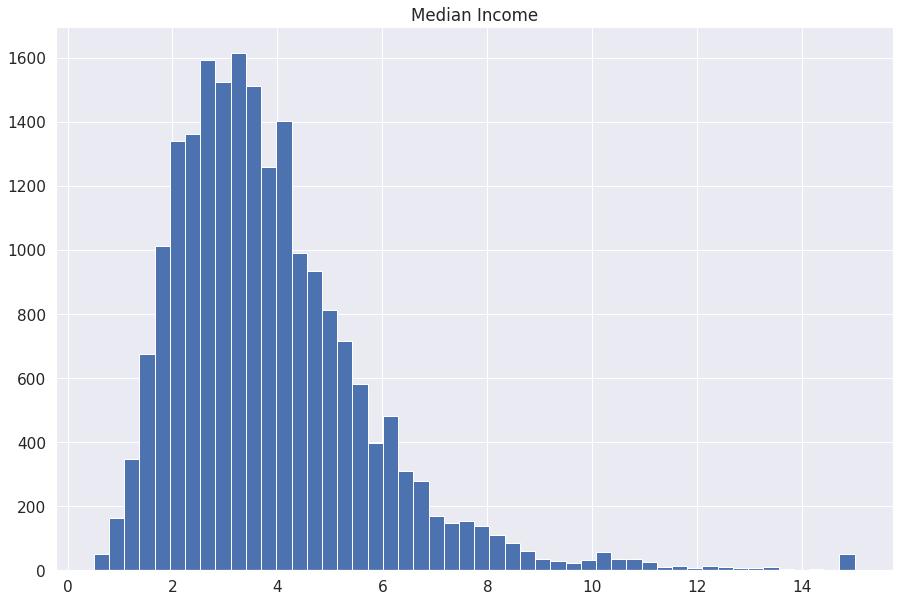

In [ ]:
df.median_income.hist(bins=50, figsize=(15,10))
plt.title("Median Income")
plt.show()

In [ ]:
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.743, 7.3]
3          (4.743, 7.3]
4        (3.535, 4.743]
              ...      
20635    (0.499, 2.563]
20636    (0.499, 2.563]
20637    (0.499, 2.563]
20638    (0.499, 2.563]
20639    (0.499, 2.563]
Name: median_income, Length: 20640, dtype: category
Categories (5, interval[float64, right]): [(0.499, 2.563] < (2.563, 3.535] < (3.535, 4.743] <
                                           (4.743, 7.3] < (7.3, 15.0]]

In [ ]:
df["income_cat"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                           labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"])

In [ ]:
df.income_cat.head(5)

0            Very High
1            Very High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_cat, Length: 20640, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very High']

In [ ]:
df.income_cat.value_counts(normalize = True)

Low              0.25
Below_Average    0.25
Above_Average    0.25
High             0.20
Very High        0.05
Name: income_cat, dtype: float64

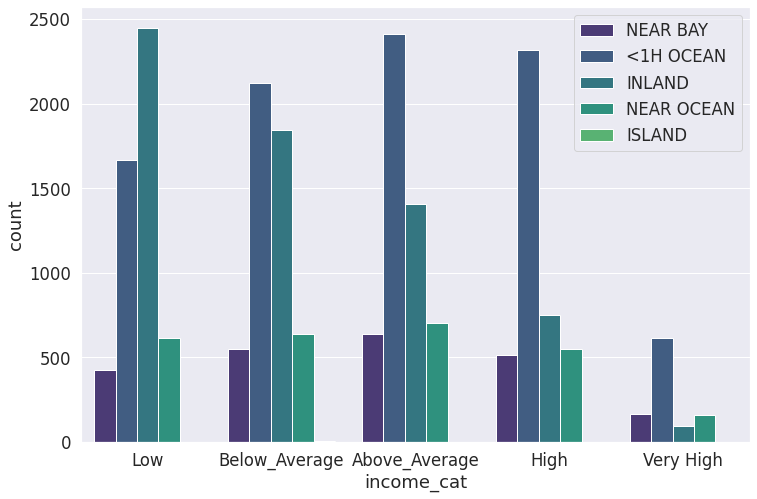

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)
plt.show()

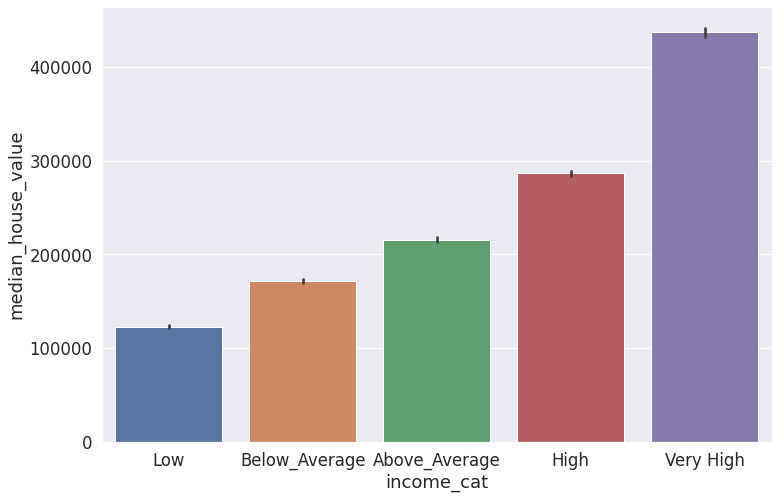

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "income_cat", y = "median_house_value", dodge = True)
plt.show()

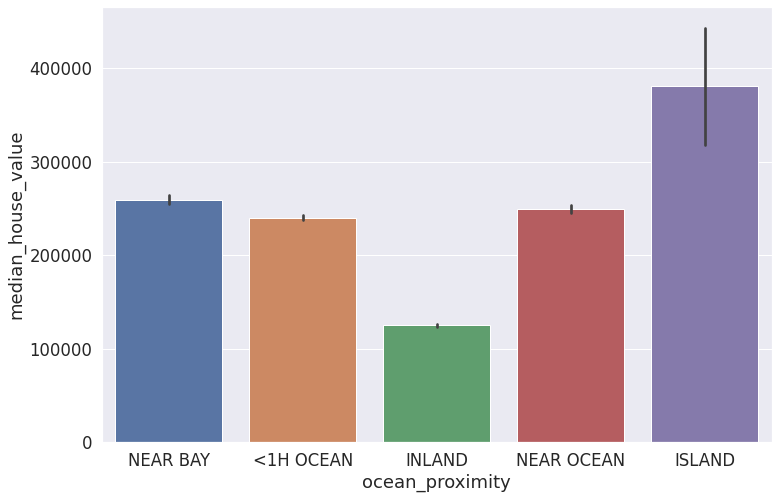

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()

In [ ]:
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])

In [ ]:
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161308,84769,155709,148132
Below_Average,196903,115214,220160,209471
Above_Average,231999,147710,261706,255610
High,292114,207970,321968,337934
Very High,439648,346034,451015,468739


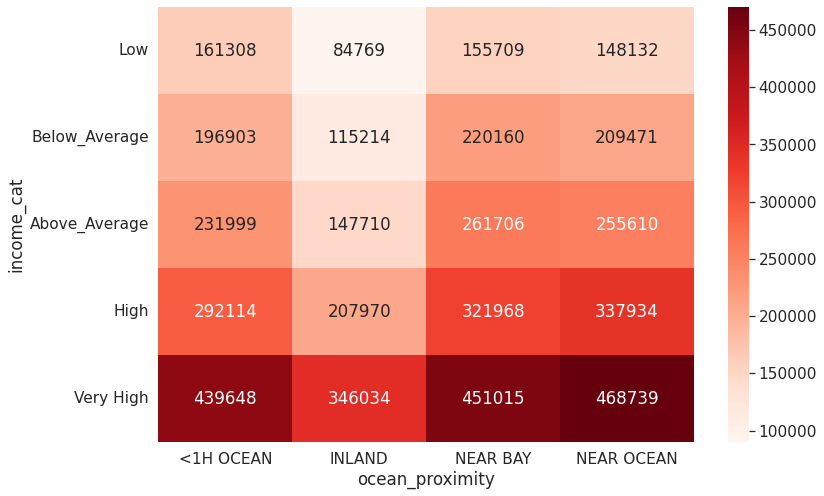

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True, fmt = "d", vmin = 90000, vmax = 470000)
plt.show()

## Training the ML Model (Random Forest Regressor)

In [ ]:
forest_reg_par = {"n_estimators" : [100,200,300,400,500],
                  "max_depth" : [20,35,50,65,75],
                  "min_samples_split" : [5,10,15,20,30],
                  "max_features" : ["sqrt"]
                 }
SVR_par = {"kernel" : ["rbf" , "poly"],
           "C" : [1,2,3,4,5]
            }
voting_reg_par = { "rf__n_estimators" : [100,200,300,400,500],
                  "rf__max_depth" : [20,35,50,65,75],
                  "rf__min_samples_split" : [5,10,15,20,30],
                  "rf__max_features" : ["sqrt"],
                  "svm_reg__kernel" : ["rbf" , "poly"],
                  "svm_reg__C" : [1,2,3,4,5]
                }
forest_reg = RandomForestRegressor()
lin_reg = LinearRegression()
svm_reg = SVR()



In [ ]:
forest_reg_par2 = {"n_estimators" : [0,10,20,30,50],
                  "max_depth" : [2,4,6,8,10],
                  "min_samples_split" : [1,2,3,4,5],
                  "max_features" : ["sqrt"]
                 }

In [ ]:
forest_grid = GridSearchCV(forest_reg,forest_reg_par,
             cv = 5,return_train_score = True)
SVR_grid =  GridSearchCV(svm_reg,SVR_par,
             cv = 5 ,return_train_score = True)



In [ ]:
forest_grid2 = GridSearchCV(forest_reg,forest_reg_par2,
             cv = 5,return_train_score = True)

In [ ]:
forest_reg.fit(xtrain, ytrain)
svm_reg.fit(xtrain,ytrain)

SVR_grid.fit(xtrain,ytrain)
forest_grid.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 35, 50, 65, 75],
                         'max_features': ['sqrt'],
                         'min_samples_split': [5, 10, 15, 20, 30],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [ ]:
forest_grid2.fit(xtrain, ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 625.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 392, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater than zero, got 0.



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [0, 10, 20, 30, 50]},
             return_train_score=True)

In [ ]:
forest_grid2.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=30)

In [ ]:
voting_grid = VotingRegressor(
    estimators = [('svm_reg' , SVR_grid.best_estimator_) , ('rf' , forest_grid.best_estimator_)])

voting_reg = VotingRegressor(
    estimators = [('lr' , lin_reg) , ('svm_reg' , svm_reg) , ('rf' , forest_reg)])

voting_grid.fit(xtrain,ytrain)
voting_reg.fit(xtrain,ytrain)



VotingRegressor(estimators=[('lr', LinearRegression()), ('svm_reg', SVR()),
                            ('rf', RandomForestRegressor())])

In [ ]:
print("\nRandom forest best parameters",
      forest_grid.best_params_, "\n SVR best parameters " , SVR_grid.best_params_)


Random forest best parameters {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 500} 
 SVR best parameters  {'C': 5, 'kernel': 'rbf'}


In [ ]:
voting_grid

VotingRegressor(estimators=[('svm_reg', SVR(C=5)),
                            ('rf',
                             RandomForestRegressor(max_depth=50,
                                                   max_features='sqrt',
                                                   min_samples_split=5,
                                                   n_estimators=500))])

## Evaluating the Model on the Test Set

In [ ]:
regressors = [voting_reg,voting_grid]
mean_rmse = {}
for reg in regressors:
    scores = cross_val_score(reg,xtrain,ytrain,scoring = "neg_mean_squared_error",cv = 5)
    rmse_mean = np.sqrt(-scores).mean()
    mean_rmse[str(reg)] = rmse_mean


{"VotingRegressor(estimators=[('lr', LinearRegression()), ('svm_reg', SVR()),\n                            ('rf', RandomForestRegressor())])": 0.11519808685768344, "VotingRegressor(estimators=[('svm_reg', SVR(C=5)),\n                            ('rf',\n                             RandomForestRegressor(max_depth=50,\n                                                   max_features='sqrt',\n                                                   min_samples_split=5,\n                                                   n_estimators=500))])": 0.10896796695462214}


In [ ]:
mean_rmse[str(voting_reg)]

0.11519808685768344

In [ ]:
mean_rmse[str(voting_grid)]

0.10896796695462214

In [ ]:
scores = cross_val_score(forest_grid.best_estimator_,xtrain,ytrain,scoring = "neg_mean_squared_error",cv = 5)
rmse_mean = np.sqrt(-scores).mean()
rmse_mean

0.10446618768287866

In [ ]:
scores = cross_val_score(forest_grid2.best_estimator_,xtrain,ytrain,scoring = "neg_mean_squared_error",cv = 5)
rmse_mean = np.sqrt(-scores).mean()
rmse_mean

0.11743485755369662

In [ ]:
scores = cross_val_score(SVR_grid.best_estimator_,xtrain,ytrain,scoring = "neg_mean_squared_error",cv = 5)
rmse_mean = np.sqrt(-scores).mean()
rmse_mean

0.12070744889520257

In [ ]:
scores = cross_val_score(forest_reg,xtrain,ytrain,scoring = "neg_mean_squared_error",cv = 5)
rmse_mean = np.sqrt(-scores).mean()
rmse_mean

0.10204004016196536

In [ ]:
scores = cross_val_score(svm_reg,xtrain,ytrain,scoring = "neg_mean_squared_error",cv = 5)
rmse_mean = np.sqrt(-scores).mean()
rmse_mean

0.12479959380897736

In [ ]:
pred = forest_reg.predict(xtest)
forest_mse = mean_squared_error(ytest, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.10090172967712042

In [ ]:
pred = SVR_grid.predict(xtest)
forest_mse = mean_squared_error(ytest, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.1235050799621293

In [ ]:
pred = voting_grid.predict(xtest)
forest_mse = mean_squared_error(ytest, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.11028517687258854

In [ ]:
comp = pd.DataFrame(data = {"True_V": ytest, "Pred":pred})
ae = comp.True_V.sub(comp.Pred).abs()
mae = ae.mean()
mae

## Feature Importance

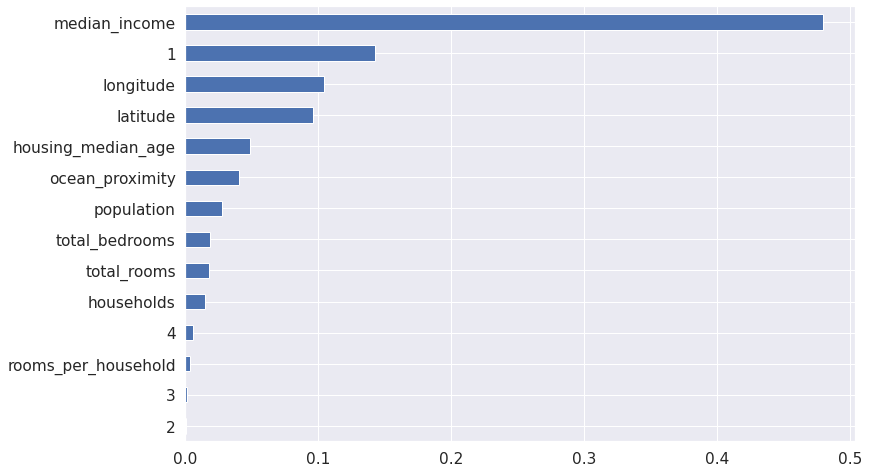

In [ ]:
forest_reg.feature_importances_
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = xtrain.columns).sort_values(ascending = False)
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()